# Cricket Pitch Detection - Frame Extraction

This notebook extracts frames from cricket video files with a step size of 10 (every 10th frame) for pitch detection and analysis. We'll process all videos in the pitch_clips folder and extract frames throughout the entire videos.

In [14]:
import cv2
import os
import random
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import glob

## Define Function to Extract Frames with a Step Size

The following function extracts frames from the entire video with a specified step size.

In [15]:
def extract_frames_with_step(video_path, output_dir, step=10, prefix='frame'):
    """
    Extract frames from the entire video with a specified step size.
    
    Args:
        video_path (str): Path to the video file
        output_dir (str): Directory to save the extracted frames
        step (int): Step size between frames (default=10, every 10th frame)
        prefix (str): Prefix for the output filenames
        
    Returns:
        int: Number of frames actually extracted
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not cap.isOpened():
        print(f"Error: Could not open video {video_path}")
        return 0
    
    # Get video properties
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    if frame_count <= 0:
        print(f"Error: Invalid frame count for {video_path}")
        cap.release()
        return 0
    
    print(f"Video has {frame_count} frames at {fps:.2f} fps (duration: {frame_count/fps:.2f} seconds)")
    
    # Extract and save frames
    saved_count = 0
    video_name = os.path.basename(video_path).split('.')[0]
    
    # Loop through all frames with the step size
    for frame_idx in range(0, frame_count, step):
        # Set the frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        
        # Read the frame
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Save the frame
        output_path = os.path.join(output_dir, f"{prefix}_{video_name}_{saved_count:04d}_frame{frame_idx}.jpg")
        cv2.imwrite(output_path, frame)
        saved_count += 1
    
    # Release the video capture object
    cap.release()
    
    return saved_count

## Set Up Video Paths and Output Directory

Scan the pitch_clips folder for all video files to process and create the output directory for frames.

In [16]:
# Define the output directory for frames
output_dir = os.path.join(os.getcwd(), 'extracted_frames')

# Define path to the pitch_clips folder
pitch_clips_dir = os.path.join(os.getcwd(), 'pitch_clips')

# Check if the pitch_clips directory exists
if not os.path.exists(pitch_clips_dir):
    print(f"The directory {pitch_clips_dir} doesn't exist. Creating it now...")
    os.makedirs(pitch_clips_dir, exist_ok=True)
    print(f"Please add your video files to {pitch_clips_dir} and run this cell again.")

# Common video file extensions
video_extensions = ('.mp4', '.avi', '.mov', '.mkv', '.flv', '.wmv')

# Get all video files from the pitch_clips folder
video_files = []
for ext in video_extensions:
    video_files.extend(glob.glob(os.path.join(pitch_clips_dir, f'*{ext}')))

# Also try lowercase extensions
for ext in [e.lower() for e in video_extensions if e.lower() != e]:
    video_files.extend(glob.glob(os.path.join(pitch_clips_dir, f'*{ext}')))

# Remove duplicates and sort
video_files = sorted(list(set(video_files)))

if not video_files:
    print(f"No video files found in {pitch_clips_dir}")
    print(f"Please add video files with extensions {video_extensions} to this folder")
else:
    print(f"Found {len(video_files)} video files in {pitch_clips_dir}:")
    for i, video in enumerate(video_files):
        print(f"  {i+1}. {os.path.basename(video)}")

Found 6 video files in c:\Users\vedha\Cricket Highlights Generator\pitch_clips:
  1. AB de Villiers fastest 100 of all time.mp4
  2. England Hit Record 408-9 In ODI v New Zealand 2015 - Extended Highlights.mp4
  3. Highlights_ Australia v India, MCG _ ODI Tri-Series 2014-15.mp4
  4. Super11 Asia Cup 2023 _ Final _ India vs Sri Lanka _ Highlights.mp4
  5. videoplayback (1).mp4
  6. videoplayback.mp4


## Extract Frames from Entire Videos with Step Size

Process each video and extract frames with a step size of 10 throughout the entire video.

In [18]:
# Step size between frames (every 10th frame)
frame_step = 10

# Check if video files were found
if not video_files:
    print("No video files to process. Please add videos to the pitch_clips folder.")
else:
    print(f"Found {len(video_files)} videos. Extracting every {frame_step}th frame from each video.")
    
    # Create or clear the output directory
    if os.path.exists(output_dir):
        # Option 1: Clear existing frames (uncomment if needed)
        # existing_frames = [f for f in os.listdir(output_dir) if f.endswith('.jpg')]
        # for frame in existing_frames:
        #     os.remove(os.path.join(output_dir, frame))
        print(f"Output directory {output_dir} already exists. New frames will be added.")
    else:
        os.makedirs(output_dir)
        print(f"Created output directory {output_dir}")
    
    # Tracking total frames extracted
    total_extracted = 0
    
    # Process each video
    for i, video_path in enumerate(tqdm(video_files, desc="Processing videos")):
        # Extract frames if the video file exists
        if os.path.exists(video_path):
            video_name = os.path.basename(video_path).split('.')[0]
            print(f"\nExtracting frames from {video_name} ({i+1}/{len(video_files)})")
            
            frames_extracted = extract_frames_with_step(
                video_path,
                output_dir,
                step=frame_step,
                prefix=f"{video_name}"
            )
            
            total_extracted += frames_extracted
            print(f"Extracted {frames_extracted} frames (every {frame_step}th frame)")
        else:
            print(f"Skipping {os.path.basename(video_path)} - file does not exist")
    
    print(f"\nTotal frames extracted from all videos: {total_extracted}")

Found 6 videos. Extracting every 10th frame from each video.
Created output directory c:\Users\vedha\Cricket Highlights Generator\extracted_frames


Processing videos:   0%|          | 0/6 [00:00<?, ?it/s]


Extracting frames from AB de Villiers fastest 100 of all time (1/6)
Video has 2760 frames at 25.01 fps (duration: 110.36 seconds)
Extracted 276 frames (every 10th frame)

Extracting frames from England Hit Record 408-9 In ODI v New Zealand 2015 - Extended Highlights (2/6)
Video has 3016 frames at 25.01 fps (duration: 120.60 seconds)
Extracted 276 frames (every 10th frame)

Extracting frames from England Hit Record 408-9 In ODI v New Zealand 2015 - Extended Highlights (2/6)
Video has 3016 frames at 25.01 fps (duration: 120.60 seconds)
Extracted 302 frames (every 10th frame)

Extracting frames from Highlights_ Australia v India, MCG _ ODI Tri-Series 2014-15 (3/6)
Video has 1823 frames at 25.01 fps (duration: 72.88 seconds)
Extracted 302 frames (every 10th frame)

Extracting frames from Highlights_ Australia v India, MCG _ ODI Tri-Series 2014-15 (3/6)
Video has 1823 frames at 25.01 fps (duration: 72.88 seconds)
Extracted 183 frames (every 10th frame)

Extracting frames from Super11 Asia 

## Verify Extracted Frames

Display some of the extracted frames to verify they were saved correctly.

Total frames saved: 1481

Frame distribution across videos:
AB de Villiers fastest 100 of all time: 276 frames
England Hit Record 408-9 In ODI v New Zealand 2015 - Extended Highlights: 302 frames
Highlights: 183 frames
Super11 Asia Cup 2023 : 219 frames
videoplayback (1): 231 frames
videoplayback: 270 frames


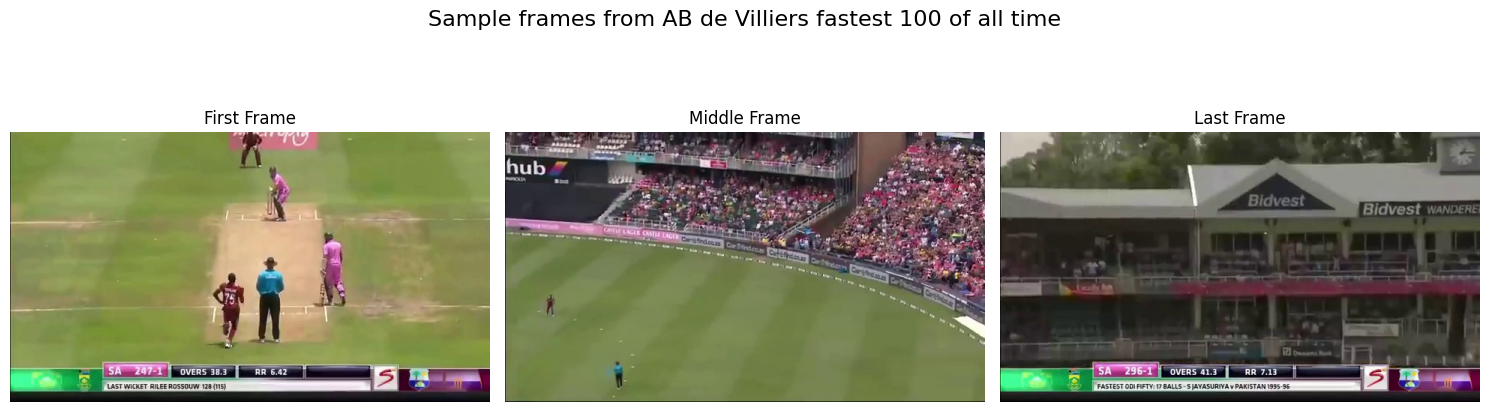

In [19]:
# List all extracted frames
extracted_frames = [f for f in os.listdir(output_dir) if f.endswith('.jpg')]

# Display the total number of frames extracted
print(f"Total frames saved: {len(extracted_frames)}")

# Display example frames from each video
if extracted_frames:
    # Group frames by video
    video_frames = {}
    for frame in extracted_frames:
        video_name = frame.split('_')[0]  # Get the video prefix
        if video_name not in video_frames:
            video_frames[video_name] = []
        video_frames[video_name].append(frame)
    
    # Show distribution of frames across videos
    print("\nFrame distribution across videos:")
    for video_name, frames in video_frames.items():
        print(f"{video_name}: {len(frames)} frames")
    
    # Display first, middle, and last frame for one video to show the spread
    if video_frames:
        # Take the first video with frames
        sample_video = list(video_frames.keys())[0]
        frames = sorted(video_frames[sample_video])
        
        if len(frames) >= 3:
            # Take first, middle and last frame to show the range
            sample_frames = [frames[0], frames[len(frames)//2], frames[-1]]
            
            plt.figure(figsize=(15, 5))
            titles = ["First Frame", "Middle Frame", "Last Frame"]
            
            for i, (frame_file, title) in enumerate(zip(sample_frames, titles)):
                frame_path = os.path.join(output_dir, frame_file)
                img = cv2.imread(frame_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
                
                plt.subplot(1, 3, i+1)
                plt.imshow(img)
                plt.title(title)
                plt.axis('off')
            
            plt.suptitle(f"Sample frames from {sample_video}", fontsize=16)
            plt.tight_layout()
            plt.show()
else:
    print("No frames were extracted. Please check the video paths and ensure they exist.")

## Analysis of Dataset Creation Approach

This section evaluates the approach used for creating a dataset to detect cricket pitches and identify frames where the ball is about to be delivered.

### Current Approach Strengths

The current continuous frame extraction from the middle of videos has several strengths for pitch detection:

1. **Sequential Information**: Extracting continuous frames preserves the temporal relationship, which is valuable for identifying the sequence leading up to ball delivery
2. **Mid-Video Focus**: The middle portions of cricket videos often contain the actual gameplay with pitch views, making this a reasonable area to sample
3. **Step Sampling**: Using a step size (currently 3) helps eliminate nearly identical frames while still maintaining the sequence
4. **Multiple Videos**: Sampling from multiple videos helps capture variety in lighting conditions, camera angles, pitch appearances, and teams

### Limitations and Potential Improvements

Some limitations of the current approach that could be addressed:

1. **Class Imbalance**: You may end up with many more frames showing the pitch than frames showing the exact moment of ball delivery, creating an imbalanced dataset
2. **Limited Context**: The middle sections might not capture the diversity of scenarios (close-ups, different angles, etc.)
3. **Labeling Strategy**: You'll need an efficient way to label which frames contain pitches and which specifically show delivery moments
4. **Random vs. Strategic Sampling**: Middle-of-video sampling is somewhat random; strategic sampling based on video content might be more effective

### Recommendations for Dataset Creation

Here are some recommendations to enhance your dataset for pitch detection:

1. **Stratified Sampling**: Sample from different parts of videos (beginnings of overs, middle of overs, end of overs) to ensure variety
2. **Balanced Classes**: Ensure your dataset has enough examples of:
   - Frames with clear pitch views
   - Frames with partial pitch views
   - Frames without pitches (crowd, close-ups, etc.)
   - Frames showing bowler about to deliver
   - Frames showing the actual delivery moment
3. **Data Augmentation**: After collecting frames, use augmentation techniques (rotation, brightness/contrast adjustment, cropping) to increase dataset diversity
4. **Semi-Automated Annotation**: Consider using techniques like:
   - Clustering similar frames to speed up labeling
   - Using a preliminary model to propose labels, which you then verify
   - Creating a simple UI for quick binary classification (has pitch/doesn't have pitch)
5. **Segment-Based Approach**: Instead of isolated frames, consider extracting short segments (5-10 frames) to capture the delivery motion sequence
6. **Active Learning**: Use an iterative approach where you train initial models, identify difficult or boundary cases, and add more examples of those
7. **Scene Detection**: You might benefit from using a scene detection algorithm to automatically identify points in the video where the camera switches to a pitch view

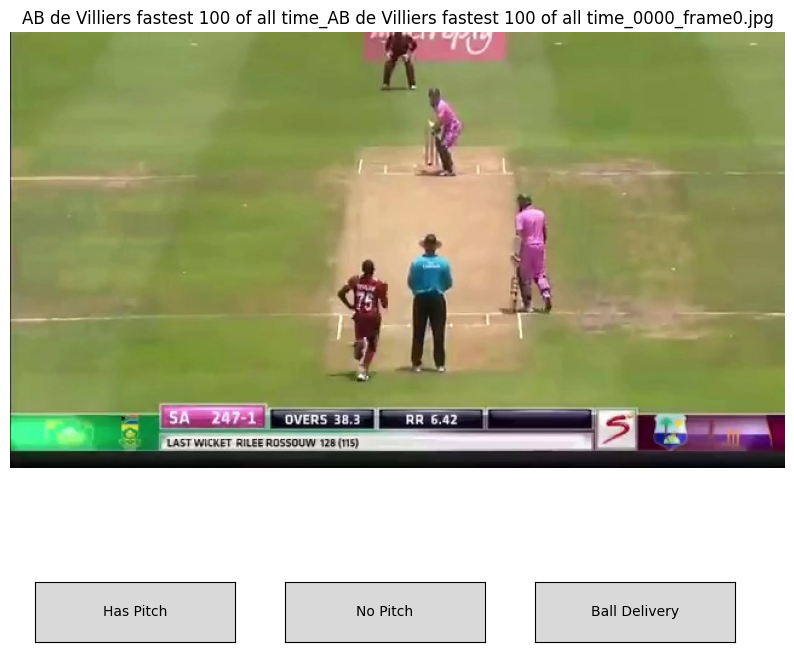

In [20]:
# Example of how to implement a simple semi-automated labeling interface
# This can help you quickly label your extracted frames

def create_pitch_detection_labeling_tool(frames_dir):
    """A simple tool to help label frames for pitch detection."""
    import matplotlib.pyplot as plt
    from matplotlib.widgets import Button
    import json
    import os
    
    # Get frames that haven't been labeled yet
    labeled_file = os.path.join(frames_dir, 'labels.json')
    
    # Load existing labels if available
    if os.path.exists(labeled_file):
        with open(labeled_file, 'r') as f:
            labels = json.load(f)
    else:
        labels = {}
    
    # Get all frames
    all_frames = [f for f in os.listdir(frames_dir) if f.endswith('.jpg')]
    unlabeled_frames = [f for f in all_frames if f not in labels]
    
    if not unlabeled_frames:
        print("All frames have been labeled! Total: {}".format(len(labels)))
        return
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.subplots_adjust(bottom=0.2)
    
    frame_idx = 0
    frame = unlabeled_frames[frame_idx]
    img = plt.imread(os.path.join(frames_dir, frame))
    ax_img = ax.imshow(img)
    ax.set_title(frame)
    ax.axis('off')
    
    # Button positions
    pitch_ax = plt.axes([0.15, 0.05, 0.2, 0.075])
    no_pitch_ax = plt.axes([0.4, 0.05, 0.2, 0.075])
    delivery_ax = plt.axes([0.65, 0.05, 0.2, 0.075])
    
    # Create buttons
    b_pitch = Button(pitch_ax, 'Has Pitch')
    b_no_pitch = Button(no_pitch_ax, 'No Pitch')
    b_delivery = Button(delivery_ax, 'Ball Delivery')
    
    # Callback functions
    def label_frame(label):
        nonlocal frame_idx
        
        # Save the label
        labels[frame] = label
        
        # Save to file every 10 frames
        if len(labels) % 10 == 0:
            with open(labeled_file, 'w') as f:
                json.dump(labels, f)
                
        # Move to next frame
        frame_idx += 1
        if frame_idx >= len(unlabeled_frames):
            plt.close()
            print(f"All frames labeled! Total: {len(labels)}")
            # Final save
            with open(labeled_file, 'w') as f:
                json.dump(labels, f)
            return
        
        # Update image
        frame = unlabeled_frames[frame_idx]
        img = plt.imread(os.path.join(frames_dir, frame))
        ax_img.set_data(img)
        ax.set_title(f"{frame} - {frame_idx+1}/{len(unlabeled_frames)}")
        fig.canvas.draw_idle()
    
    # Button click handlers
    b_pitch.on_clicked(lambda event: label_frame('has_pitch'))
    b_no_pitch.on_clicked(lambda event: label_frame('no_pitch'))
    b_delivery.on_clicked(lambda event: label_frame('delivery'))
    
    plt.show()
    
    return labels

# Uncomment to use the labeling tool
labels = create_pitch_detection_labeling_tool(output_dir)

### Conclusion

Your current approach of extracting continuous frames from the middle of videos is a good starting point for creating a pitch detection dataset. The key improvements would be to:

1. Ensure sufficient diversity in your dataset (different camera angles, lighting conditions, etc.)
2. Balance the classes to avoid having too many similar frames
3. Implement an efficient labeling strategy
4. Consider supplementing with some strategic sampling to capture specific moments of interest

With these refinements, your dataset should be well-suited for training a classifier to detect cricket pitches and identify when the ball is about to be delivered.